In [189]:
from numpy.random import randint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from os import path, listdir
from utils import neg_scenario_from_util_matrices, count_acceptable_offers
import pandas as pd
from uuid import uuid4
from shutil import rmtree

In [108]:
shape = (6,8)
lower = 0
upper = 100
constr = -1000
csv_columns = ["n", "m", "rho_a", "rho_b", "a_accepts", "b_accepts", "both_accept",
                        "p_a", "p_b", 'success', 'total_message_count',
                        'n_constr', 'n_constr_discovered', 'n_constr_opponent_discovered',
                        'strat', 'opponent_strat', 'utility', 'opponent_utility', 'total_generated_offers']

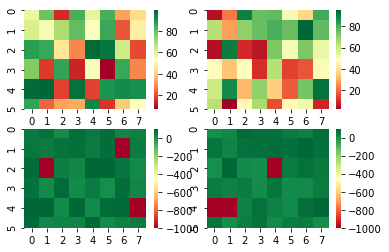

In [142]:
u_a = randint(lower, upper, shape[0]*shape[1]).reshape(shape)
u_b = randint(lower, upper, shape[0]*shape[1]).reshape(shape)
u_a_constr, u_b_constr = insert_constr(u_a,u_b,3)

fig, axes = plt.subplots(nrows=2,ncols=2)
sns.heatmap(u_a, ax=axes[0,0], cmap="RdYlGn")
sns.heatmap(u_b, ax=axes[0,1], cmap="RdYlGn")
sns.heatmap(u_a_constr, ax=axes[1,0], cmap="RdYlGn")
sns.heatmap(u_b_constr, ax=axes[1,1], cmap="RdYlGn")
plt.show()

In [202]:
def setup_random_scenarios(root_dir,shape,numb_of_scenarios):
    if path.exists(root_dir):
        rmtree(root_dir)
    os.mkdir(root_dir)
    
    lower = 0
    upper = 100
    
    base_a = randint(lower, upper, shape[0]*shape[1]).reshape(shape)
    base_b = randint(lower, upper, shape[0]*shape[1]).reshape(shape)
    
    for _ in range(numb_of_scenarios):
        uuid = uuid4()
        
        scenario_dir = path.join(root_dir,str(uuid)) 
        os.mkdir(scenario_dir)
        
        for cntr in range(2*shape[0]):
            instance_dir = path.join(scenario_dir,str(cntr))
            os.mkdir(instance_dir)
            constr_a, constr_b = insert_difficult_constraints(base_a,base_b,cntr)
            np.save(path.join(instance_dir,"a.npy"),constr_a)
            np.save(path.join(instance_dir,"b.npy"),constr_b)
            
        

In [203]:
def insert_difficult_constraints(a,b,numb):
    assert a.shape == b.shape
    a_ret = a.copy()
    b_ret = b.copy()
    constr = -max(a.max(),b.max()) * 2 * shape[0] # constr is minus twice the max times N
    
    
    for ind in zip(*np.unravel_index(np.argsort(b,axis=None)[::-1][:numb],b.shape)):
        i,j = ind
        a_ret[i,j] = constr
    
    for ind in zip(*np.unravel_index(np.argsort(a,axis=None)[::-1][:numb],a.shape)):
        i,j = ind
        b_ret[i,j] = constr

    return a_ret,b_ret


In [211]:
setup_random_scenarios("./scenarios",shape,10)

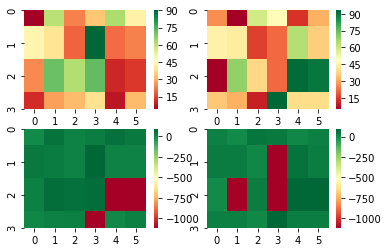

In [210]:
scenario_dir = next(iter(listdir("./scenarios")))
a_base = np.load("./scenarios/{dir}/0/a.npy".format(dir=scenario_dir))
b_base = np.load("./scenarios/{dir}/0/b.npy".format(dir=scenario_dir))
a_constr = np.load("./scenarios/{dir}/3/a.npy".format(dir=scenario_dir))
b_constr = np.load("./scenarios/{dir}/3/b.npy".format(dir=scenario_dir))

fig, axes = plt.subplots(nrows=2,ncols=2)
sns.heatmap(a_base, ax=axes[0,0], cmap="RdYlGn")
sns.heatmap(b_base, ax=axes[0,1], cmap="RdYlGn")
sns.heatmap(a_constr, ax=axes[1,0], cmap="RdYlGn")
sns.heatmap(b_constr, ax=axes[1,1], cmap="RdYlGn")
plt.show()